In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv('/content/fifa_cleaned.csv')
data.head()

,id,name,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,wage_euro,preferred_foot,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),work_rate,release_clause_euro,club_team
0,158023,L. Messi,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,110500000.0,565000.0,Left,5,4,4,Medium/ Low,226500000.0,FC Barcelona
1,190460,C. Eriksen,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,69500000.0,205000.0,Right,3,5,4,High/ Medium,133800000.0,Tottenham Hotspur
2,195864,P. Pogba,25,190.50,83.9,"CM,CAM",France,88,91,73000000.0,255000.0,Right,4,4,5,High/ Medium,144200000.0,Manchester United
3,198219,L. Insigne,27,162.56,59.0,"LW,ST",Italy,88,88,62000000.0,165000.0,Right,3,4,4,High/ Medium,105400000.0,Napoli
4,201024,K. Koulibaly,27,187.96,88.9,CB,Senegal,88,91,60000000.0,135000.0,Right,3,3,2,High/ High,106500000.0,Napoli


In [3]:
data= pd.read_csv('fifa_cleaned.csv',index_col='id')
data.head()

,name,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,wage_euro,preferred_foot,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),work_rate,release_clause_euro,club_team
id,,,,,,,,,,,,,,,,,
158023,L. Messi,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,110500000.0,565000.0,Left,5,4,4,Medium/ Low,226500000.0,FC Barcelona
190460,C. Eriksen,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,69500000.0,205000.0,Right,3,5,4,High/ Medium,133800000.0,Tottenham Hotspur
195864,P. Pogba,25,190.50,83.9,"CM,CAM",France,88,91,73000000.0,255000.0,Right,4,4,5,High/ Medium,144200000.0,Manchester United
198219,L. Insigne,27,162.56,59.0,"LW,ST",Italy,88,88,62000000.0,165000.0,Right,3,4,4,High/ Medium,105400000.0,Napoli
201024,K. Koulibaly,27,187.96,88.9,CB,Senegal,88,91,60000000.0,135000.0,Right,3,3,2,High/ High,106500000.0,Napoli


In [4]:
data.isna().sum()

name                                0
age                                 0
height_cm                           0
weight_kgs                          0
positions                           0
nationality                         0
overall_rating                      0
potential                           0
value_euro                        255
wage_euro                         246
preferred_foot                      0
international_reputation(1-5)       0
weak_foot(1-5)                      0
skill_moves(1-5)                    0
work_rate                           0
release_clause_euro              1837
club_team                          14
dtype: int64

In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 17954 entries, 158023 to 247187
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           17954 non-null  object 
 1   age                            17954 non-null  int64  
 2   height_cm                      17954 non-null  float64
 3   weight_kgs                     17954 non-null  float64
 4   positions                      17954 non-null  object 
 5   nationality                    17954 non-null  object 
 6   overall_rating                 17954 non-null  int64  
 7   potential                      17954 non-null  int64  
 8   value_euro                     17699 non-null  float64
 9   wage_euro                      17708 non-null  float64
 10  preferred_foot                 17954 non-null  object 
 11  international_reputation(1-5)  17954 non-null  int64  
 12  weak_foot(1-5)                 17954 non

In [8]:
data['value_euro']= data['value_euro'].fillna(data['value_euro'].median())
data['wage_euro']= data['wage_euro'].fillna(data['wage_euro'].median())
data['release_clause_euro']= data['release_clause_euro'].fillna(data['release_clause_euro'].mode().loc[0])
data.isna().sum()

name                              0
age                               0
height_cm                         0
weight_kgs                        0
positions                         0
nationality                       0
overall_rating                    0
potential                         0
value_euro                        0
wage_euro                         0
preferred_foot                    0
international_reputation(1-5)     0
weak_foot(1-5)                    0
skill_moves(1-5)                  0
work_rate                         0
release_clause_euro               0
club_team                        14
dtype: int64

In [9]:
data["club_team"].unique
data[pd.isnull(data.club_team)]
data["club_team"].fillna("No clube", inplace = True)

In [10]:
data.isna().sum()

name                             0
age                              0
height_cm                        0
weight_kgs                       0
positions                        0
nationality                      0
overall_rating                   0
potential                        0
value_euro                       0
wage_euro                        0
preferred_foot                   0
international_reputation(1-5)    0
weak_foot(1-5)                   0
skill_moves(1-5)                 0
work_rate                        0
release_clause_euro              0
club_team                        0
dtype: int64

In [11]:
data.columns

Index(['name', 'age', 'height_cm', 'weight_kgs', 'positions', 'nationality',
       'overall_rating', 'potential', 'value_euro', 'wage_euro',
       'preferred_foot', 'international_reputation(1-5)', 'weak_foot(1-5)',
       'skill_moves(1-5)', 'work_rate', 'release_clause_euro', 'club_team'],
      dtype='object')

In [ ]:
plt.figure(figsize=(10,8))
plt.boxplot(data[['age', 'height_cm','weight_kgs','wage_euro']],labels=['age', 'height_cm','weight_kgs','wage_euro'])
plt.title('box plots of the data')
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
plt.boxplot(data[['overall_rating', 'potential', 'value_euro']],labels=['overall_rating', 'potential', 'value_euro'])
plt.title('box plots of the data')
plt.show()

In [13]:
q1=np.percentile(data['wage_euro'],25,interpolation='midpoint')
q2=np.percentile(data['wage_euro'],50,interpolation='midpoint')
q3=np.percentile(data['wage_euro'],75,interpolation='midpoint')

In [14]:
iqr=q3-q1

In [15]:
lw=q1-1.5*iqr
up=q3+1.5*iqr
outlier=[]
for x in data['wage_euro']:
    if((x>up)or(x<lw)):
        outlier.append(x)
ind=(data['wage_euro']>up)|(data['wage_euro']<lw)
dt=data.loc[ind].index
data.drop(dt,inplace=True)

In [16]:
q1=np.percentile(data['value_euro'],25,interpolation='midpoint')
q2=np.percentile(data['value_euro'],50,interpolation='midpoint')
q3=np.percentile(data['value_euro'],75,interpolation='midpoint')
iqr=q3-q1
lw=q1-1.5*iqr
up=q3+1.5*iqr
outlier=[]
for x in data['value_euro']:
    if((x>up)or(x<lw)):
        outlier.append(x)
ind=(data['value_euro']>up)|(data['value_euro']<lw)
dt=data.loc[ind].index
data.drop(dt,inplace=True)

In [17]:
q1=np.percentile(data['value_euro'],25,interpolation='midpoint')
q2=np.percentile(data['value_euro'],50,interpolation='midpoint')
q3=np.percentile(data['value_euro'],75,interpolation='midpoint')
iqr=q3-q1
lw=q1-1.5*iqr
up=q3+1.5*iqr
outlier=[]
for x in data['age']:
    if((x>up)or(x<lw)):
        outlier.append(x)
ind=(data['age']>up)|(data['age']<lw)
dt=data.loc[ind].index
data.drop(dt,inplace=True)

In [ ]:
plt.figure(figsize=(10,8))
plt.boxplot(data[['age', 'height_cm','weight_kgs','wage_euro']],labels=['age', 'height_cm','weight_kgs','wage_euro'])
plt.title('box plots of the data')

In [ ]:
plt.figure(figsize=(10,8))
plt.boxplot(data[['overall_rating', 'potential', 'value_euro']],labels=['overall_rating', 'potential', 'value_euro'])
plt.title('box plots of the data')
plt.show()


In [34]:
data.columns

Index(['name', 'age', 'height_cm', 'weight_kgs', 'positions', 'nationality',
       'overall_rating', 'potential', 'value_euro', 'preferred_foot',
       'weak_foot(1-5)', 'work_rate', 'release_clause_euro', 'club_team',
       'euro', 'move_rating'],
      dtype='object')

In [21]:
data['move_rating'] = data['international_reputation(1-5)']+ data['skill_moves(1-5)']
data.drop(columns=['international_reputation(1-5)','skill_moves(1-5)'],axis=1, inplace=True)
data.head()

,name,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,preferred_foot,weak_foot(1-5),work_rate,release_clause_euro,club_team,euro,move_rating
id,,,,,,,,,,,,,,,,
49031,S. Sorrentino,39,185.42,84.8,GK,Italy,80,80,1000000.0,Right,3,Medium/ Medium,1800000.0,Chievo Verona,1010000.0,3
146748,Diego López,37,195.58,88.9,GK,Spain,80,80,2000000.0,Right,3,Medium/ Medium,4200000.0,RCD Espanyol,2017000.0,4
156713,A. Granqvist,33,193.04,83.9,CB,Sweden,80,80,700000.0,Right,4,High/ Medium,1100000.0,Sweden,703000.0,4
214394,W. Barrios,25,152.40,71.2,"CDM,CM",Colombia,78,83,700000.0,Right,3,Medium/ High,1100000.0,Colombia,703000.0,4
153260,Hilton,41,154.94,78.0,CB,Brazil,78,78,700000.0,Right,3,Low/ Medium,1100000.0,Montpellier HSC,718000.0,5


In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in data:
    data[i]=le.fit_transform(data[i])
data.head()

,name,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,preferred_foot,weak_foot(1-5),work_rate,release_clause_euro,club_team,euro,move_rating
id,,,,,,,,,,,,,,,,
49031,11784,22,11,33,267,76,33,31,57,1,2,8,731,143,565,1
146748,3231,20,15,37,267,133,33,31,67,1,2,8,755,483,769,2
156713,460,16,14,32,77,138,33,31,45,1,3,2,724,601,361,2
214394,12728,8,0,19,119,29,31,34,45,1,2,6,724,165,361,2
153260,4962,24,1,26,77,18,31,29,45,1,2,5,724,408,374,3


Text(0, 0.5, 'name')

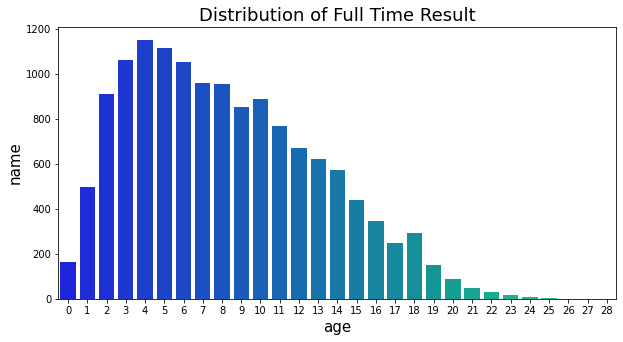

In [23]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.countplot(data=data,x="age",palette="winter")
plt.title("Distribution of Full Time Result",size=18)
plt.xlabel("age",size=15)
plt.ylabel("name",size=15)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.3,random_state=42)

In [ ]:
from sklearn import linear_model
model=linear_model.LinearRegression()
lr = model.fit(X_train,Y_train)

In [ ]:
y_pred=model.predict(X_test)
y_pred

In [ ]:
Y_test

In [ ]:
model.score(X_test,Y_test)

0.7124879040092851

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test,y_pred)


7.332730534054063